In [1]:
import pandas as pd # ETL
import matplotlib.pyplot as plt

In [2]:
path_csv = 'datasets/wages.csv'
wages = pd.read_csv(path_csv, sep=',')
type(wages)

pandas.core.frame.DataFrame

In [3]:
wages.head()

,earn,height,sex,race,ed,age
0,79571.299011,73.89,male,white,16,49
1,96396.988643,66.23,female,white,16,62
2,48710.666947,63.77,female,white,16,33
3,80478.096153,63.22,female,other,16,95
4,82089.345498,63.08,female,white,17,43


In [4]:
wages.describe()

,earn,height,ed,age
count,1379.000000,1379.000000,1379.000000,1379.000000
mean,32446.292622,66.592640,13.354605,45.328499
std,31257.070006,3.818108,2.438741,15.789715
min,-98.580489,57.340000,3.000000,22.000000
25%,10538.790721,63.720000,12.000000,33.000000
50%,26877.870178,66.050000,13.000000,42.000000
75%,44506.215336,69.315000,15.000000,55.000000
max,317949.127955,77.210000,18.000000,95.000000


In [5]:
import matplotlib.pyplot as plt

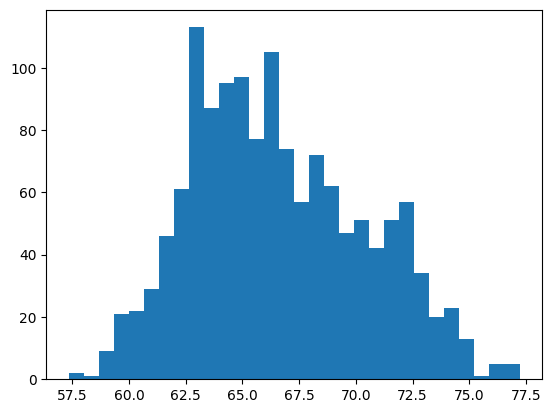

In [6]:
plt.hist(wages["height"], bins=30);

In [7]:
median_val = wages['height'].median()

In [8]:
mean_val = wages['height'].mean()

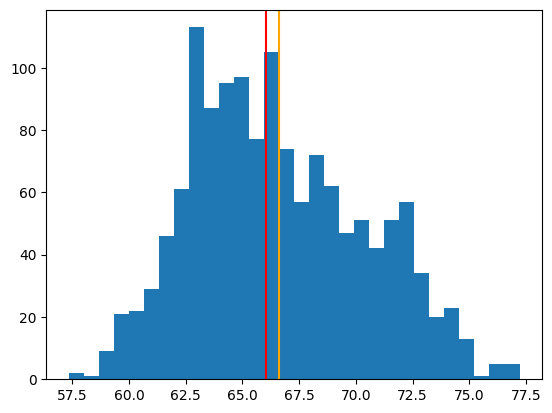

In [9]:
plt.hist(wages["height"], bins=30);
plt.axvline(median_val, color='red')
plt.axvline(mean_val, color='orange')

In [10]:
wages['earn'].mode()

0          -98.580489
1          -95.710279
2          -66.128300
3          -56.321979
4          -49.597624
            ...      
1374    198835.433852
1375    235388.719223
1376    270275.894208
1377    278213.531776
1378    317949.127955
Name: earn, Length: 1379, dtype: float64

In [11]:
Q1 = wages['earn'].quantile(0.25)
Q3 = wages['earn'].quantile(0.75)
IQR = Q3 - Q1
print(IQR)

33967.424614961754


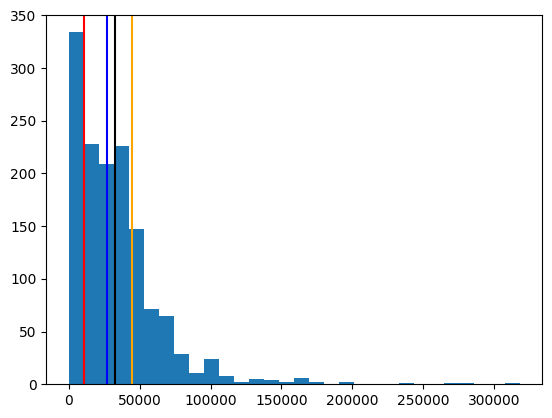

In [12]:
plt.hist(wages["earn"], bins=30);
plt.axvline(Q1, color='red')
plt.axvline(Q3, color='orange')
plt.axvline(wages["earn"].mean(), color='black')
plt.axvline(wages["earn"].median(), color='blue')


In [13]:
wages['earn'].std(ddof=1)

np.float64(31257.07000620988)

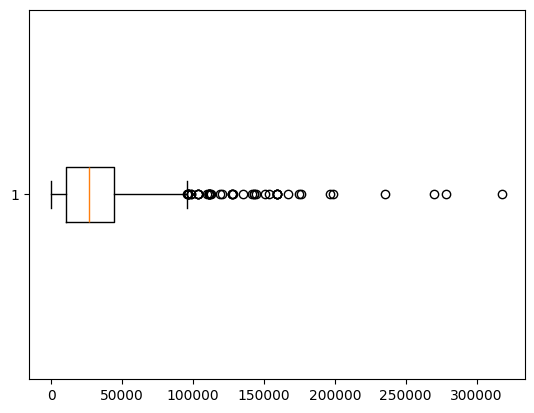

In [14]:
plt.boxplot(wages['earn'], vert=False);

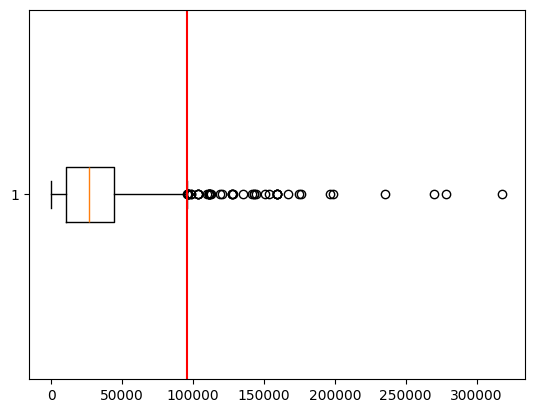

In [15]:
Q1 = wages['earn'].quantile(0.25)
Q3 = wages['earn'].quantile(0.75)
IQR = Q3 - Q1
lim_sup = 1.5 * IQR + Q3
plt.boxplot(wages['earn'], vert=False);
plt.axvline(lim_sup, color='red')

In [16]:
wages[wages['earn'] >= lim_sup]

,earn,height,sex,race,ed,age
1,96396.988643,66.23,female,white,16,62
38,119251.055120,71.92,male,white,17,43
104,96382.890091,69.55,female,white,18,67
128,112309.660734,61.91,female,white,16,42
133,96383.076423,64.00,female,white,16,39
136,111283.259407,70.25,male,white,14,39
163,143095.852139,72.09,male,white,12,30
187,103375.877816,67.81,male,white,16,50
202,198835.433852,74.22,male,white,18,49
207,111301.925090,72.23,male,white,14,36


In [17]:
boolean = wages['earn'] >= lim_sup
wages['earn'][boolean] = wages['earn'].mean()

/var/folders/k2/cqqhx1v12xs6q9kxwbqvdtzr0000gn/T/ipykernel_12688/1298281952.py:2: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  wages['earn'][boolean] = wages['earn'].mean()
/var/folders/k2/cqqhx1v12xs6q9kxwbqvdtzr0000gn/T/ipykernel_12688/12

In [18]:
wages.loc[boolean, 'earn'] = wages['earn'].mean()

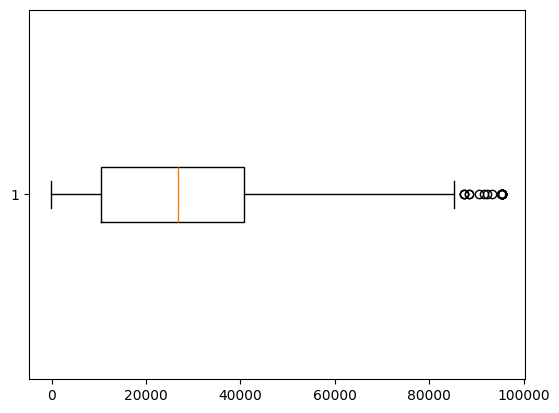

In [19]:
plt.boxplot(wages['earn'], vert=False);

In [20]:
wages = pd.read_csv(path_csv, sep=',')
wages.head()

,earn,height,sex,race,ed,age
0,79571.299011,73.89,male,white,16,49
1,96396.988643,66.23,female,white,16,62
2,48710.666947,63.77,female,white,16,33
3,80478.096153,63.22,female,other,16,95
4,82089.345498,63.08,female,white,17,43


Text(0, 0.5, 'earn')

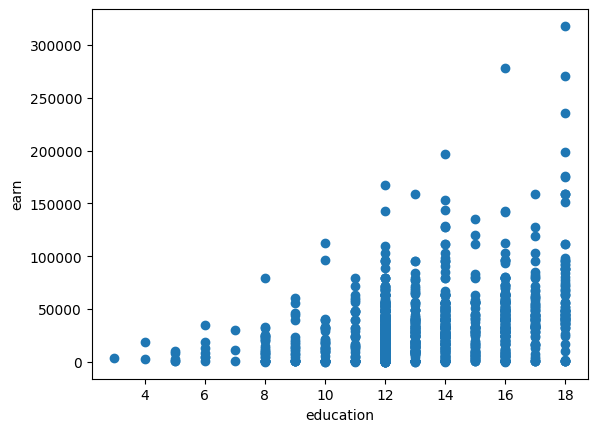

In [21]:
plt.scatter(wages['ed'], wages['earn'])
plt.xlabel('education')
plt.ylabel('earn')

In [22]:
import numpy as np
np.corrcoef(wages['ed'], wages['earn'])

array([[1.        , 0.35037351],
       [0.35037351, 1.        ]])

[[1.         0.07400349]
 [0.07400349 1.        ]]


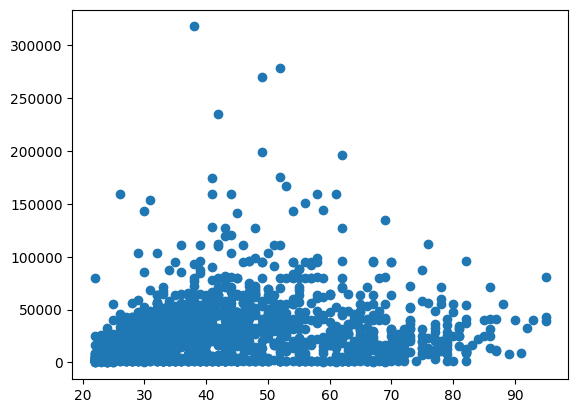

In [23]:
plt.scatter(wages['age'], wages['earn'])
print(np.corrcoef(wages['age'], wages['earn']))

In [24]:
import seaborn as sns # !pip install <librereria>

In [25]:
wages.head()

,earn,height,sex,race,ed,age
0,79571.299011,73.89,male,white,16,49
1,96396.988643,66.23,female,white,16,62
2,48710.666947,63.77,female,white,16,33
3,80478.096153,63.22,female,other,16,95
4,82089.345498,63.08,female,white,17,43


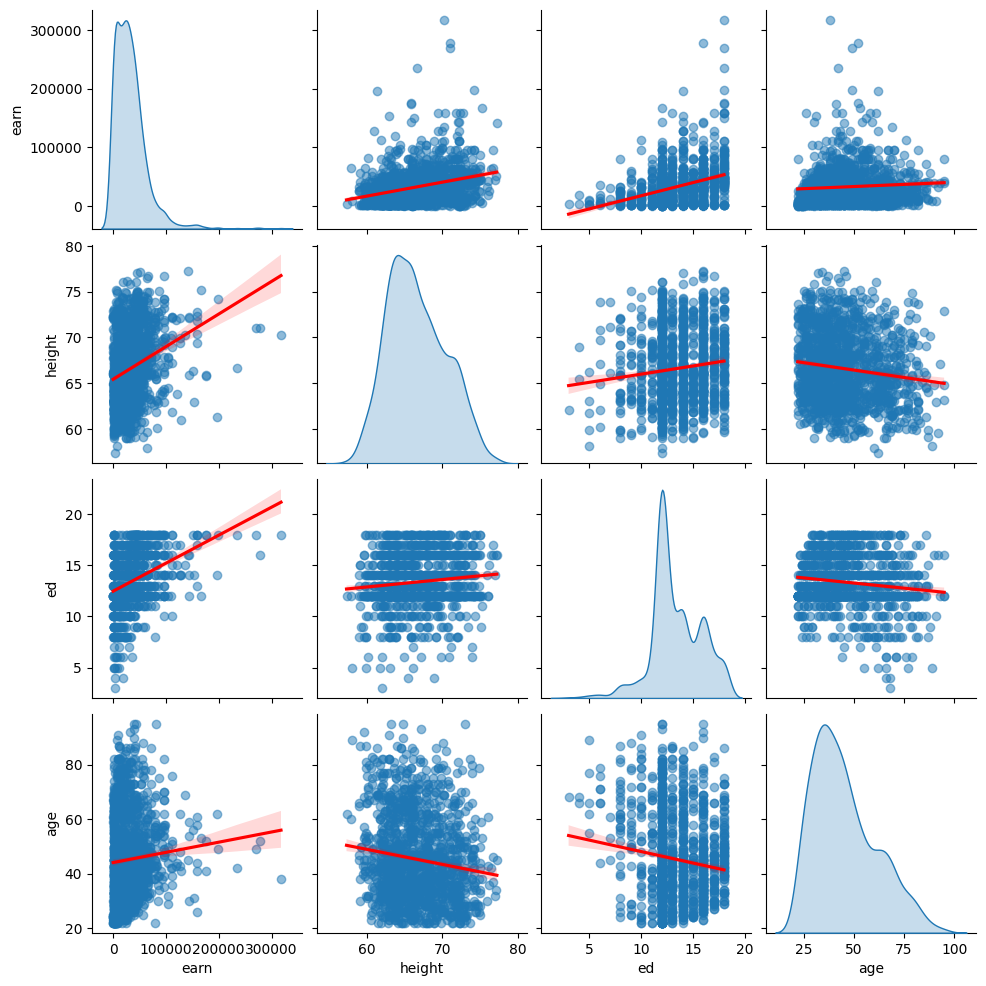

In [26]:
sns.pairplot(wages, kind='reg', diag_kind='kde',
            plot_kws={'line_kws': {'color':'red'}, 'scatter_kws': {'alpha':0.5}}
            )

In [27]:
# Read the data from the URL
housing = pd.read_csv('https://raw.githubusercontent.com/ageron/handson-ml/master/datasets/housing/housing.csv')

# See the structure of the data
print(housing.head())

   longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0    -122.23     37.88                41.0        880.0           129.0   
1    -122.22     37.86                21.0       7099.0          1106.0   
2    -122.24     37.85                52.0       1467.0           190.0   
3    -122.25     37.85                52.0       1274.0           235.0   
4    -122.25     37.85                52.0       1627.0           280.0   

   population  households  median_income  median_house_value ocean_proximity  
0       322.0       126.0         8.3252            452600.0        NEAR BAY  
1      2401.0      1138.0         8.3014            358500.0        NEAR BAY  
2       496.0       177.0         7.2574            352100.0        NEAR BAY  
3       558.0       219.0         5.6431            341300.0        NEAR BAY  
4       565.0       259.0         3.8462            342200.0        NEAR BAY  


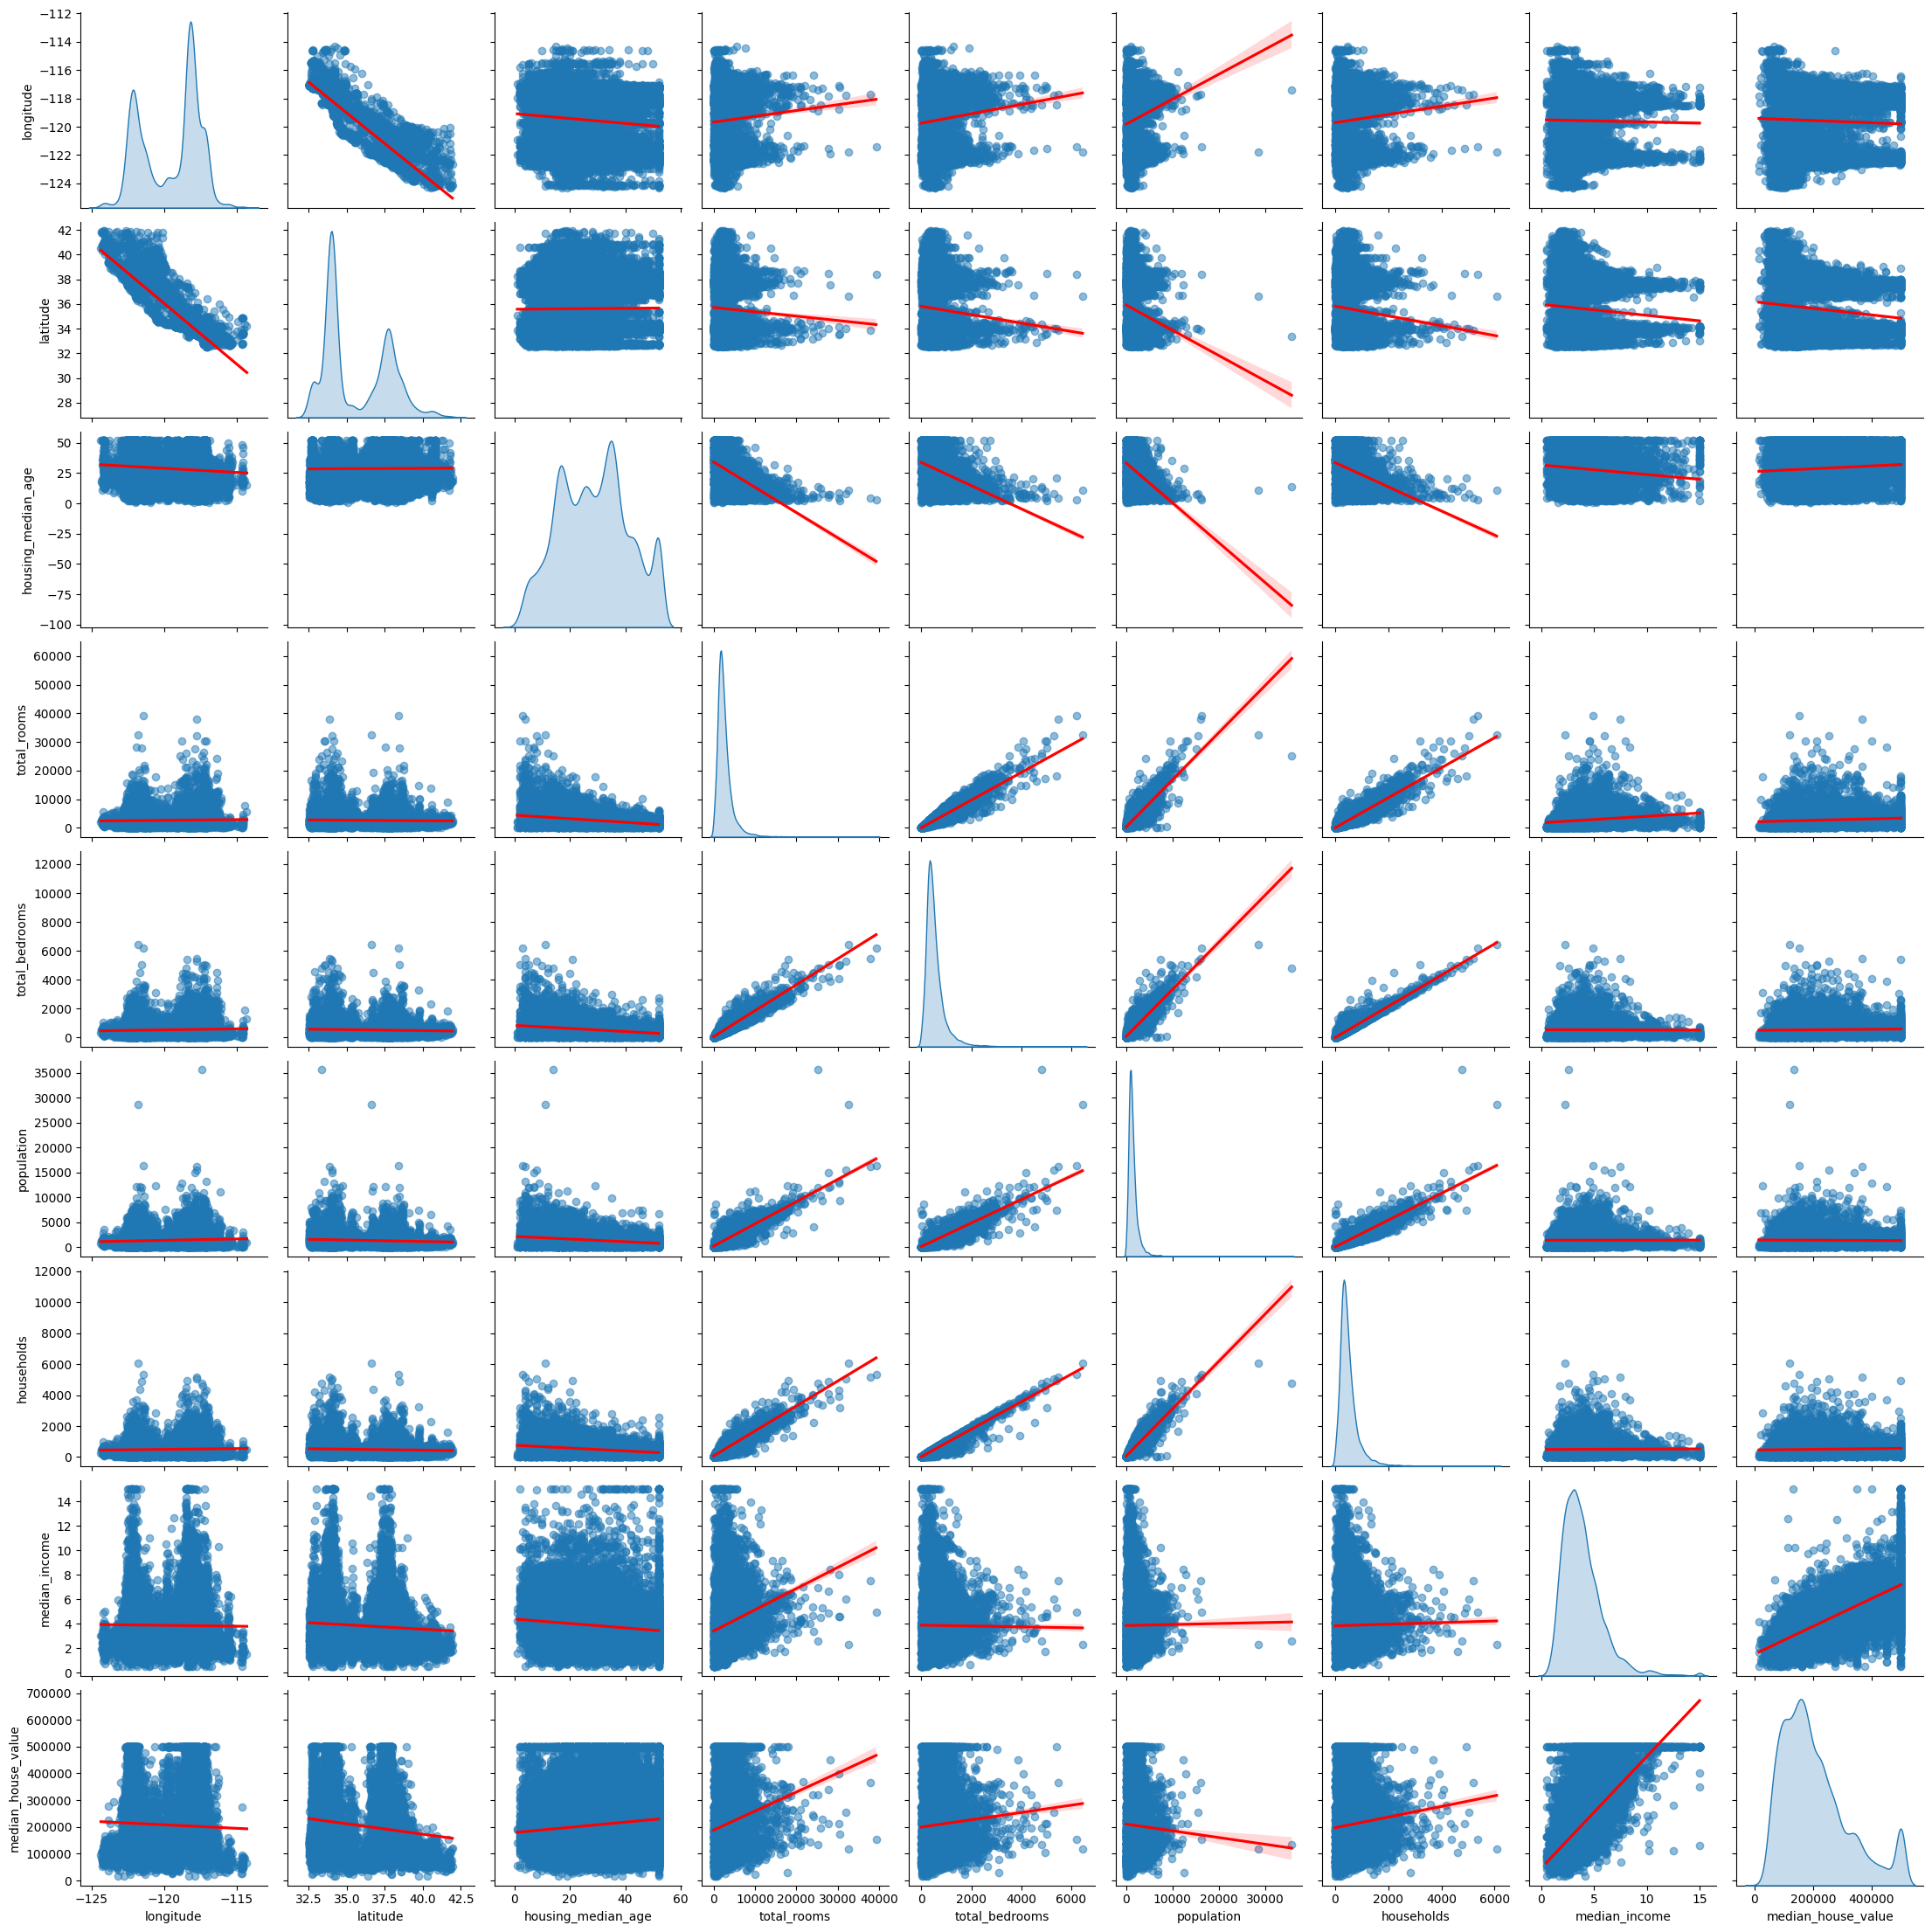

In [28]:
sns.pairplot(housing, kind='reg', diag_kind='kde',
            plot_kws={'line_kws': {'color':'red'}, 'scatter_kws': {'alpha':0.5}}
            )

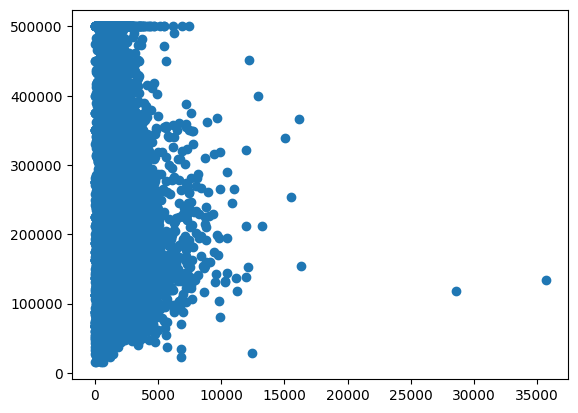

In [29]:
plt.scatter(housing['population'], housing['median_house_value'])

(array([ 877., 3612., 4099., 3771., 2799., 1769., 1239.,  752.,  479.,
        1243.]),
 array([ 14999. ,  63499.2, 111999.4, 160499.6, 208999.8, 257500. ,
        306000.2, 354500.4, 403000.6, 451500.8, 500001. ]),
 <BarContainer object of 10 artists>)

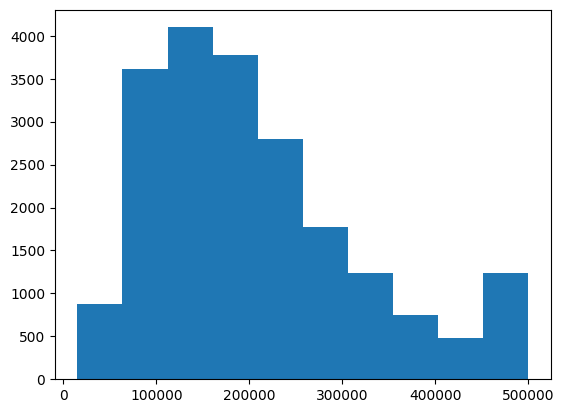

In [30]:
plt.hist(housing['median_house_value'])

In [31]:
import numpy as np

def cov(x, y):
    n = len(x)
    mean_x = np.mean(x)
    mean_y = np.mean(y)
    return np.sum( (x - mean_x) * (y-mean_y) ) * (1/(n-1))

cov(housing['median_house_value'], housing['population'])

np.float64(-3221248.729317493)

In [32]:
cov(housing['median_house_value'], housing['median_income'])

np.float64(150847.4827926605)

In [33]:
cov(housing['median_house_value'], housing['total_rooms'])

np.float64(33772890.18720309)

In [34]:
def correlation(x,y):
    std_x = np.std(x, ddof=1)
    std_y = np.std(y, ddof=1)
    r = cov(x,y) / (std_x * std_y)
    return r

correlation(housing['median_house_value'], housing['population'])

np.float64(-0.024649678888894896)

In [35]:
correlation(housing['median_house_value'], housing['median_income'])

np.float64(0.6880752079585479)

In [36]:
correlation(housing['median_house_value'], housing['total_rooms'])

np.float64(0.13415311380656308)

In [37]:
cov(20 * housing['median_house_value'], housing['total_rooms'])

np.float64(675457803.7440618)

In [38]:
correlation(20 * housing['median_house_value'], housing['total_rooms'])

np.float64(0.1341531138065631)

In [39]:
def standardization(x):
    return (x - np.mean(x)) / np.std(x, ddof=1)

x_std = standardization(housing['median_house_value'])

In [40]:
np.mean(x_std).round(4)

np.float64(-0.0)

In [41]:
np.std(x_std, ddof=1)

np.float64(1.0)

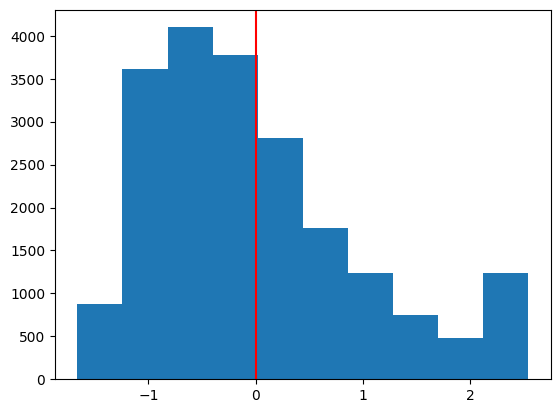

In [45]:
plt.hist(x_std);
plt.axvline(x_std.mean(), color='red')

In [46]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler

In [58]:
x = wages['earn'].values
x = x.reshape(-1,1)
scaler = StandardScaler()
x_scaled = scaler.fit_transform(x)
y = wages['ed'].values.reshape(-1,1)
y_scaled = scaler.fit_transform(y)

In [59]:
cov(x_scaled, y_scaled)

np.float64(0.3506277772450665)

In [60]:
cov(wages['earn'], wages['ed'])

np.float64(26708.239215376892)

In [61]:
correlation(wages['earn'], wages['ed'])

np.float64(0.3503735148975356)

$$
x'=\frac{x - \text{min}(x)}{\text{max}(x) - \text{min}(x)}
$$

In [66]:
mmscaler = MinMaxScaler()
median_house_age = housing['housing_median_age'].values.reshape(-1,1)
mha_scaled = mmscaler.fit_transform(median_house_age)
print(mha_scaled.min(), mha_scaled.max().round(4))

0.0 1.0


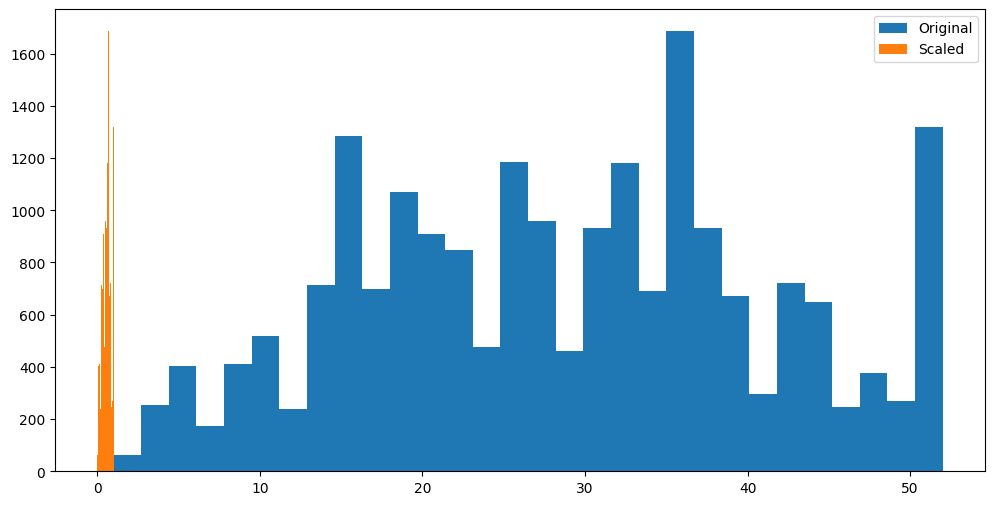

In [71]:
plt.figure(figsize=(12, 6))
plt.hist(median_house_age, bins=30, label='Original');
plt.hist(mha_scaled, bins=30, label='Scaled');
plt.legend()

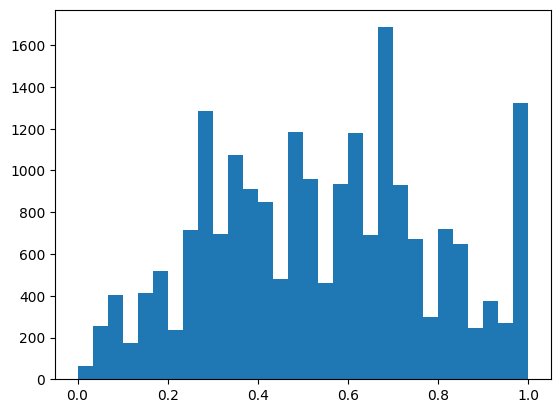

In [69]:
plt.hist(mha_scaled, bins=30, label='Scaled');

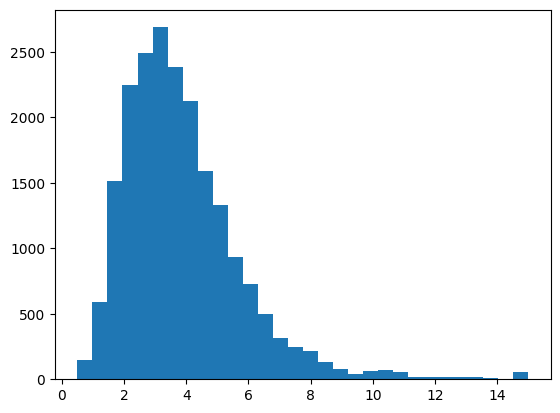

In [72]:
plt.hist(housing['median_income'],bins=30);

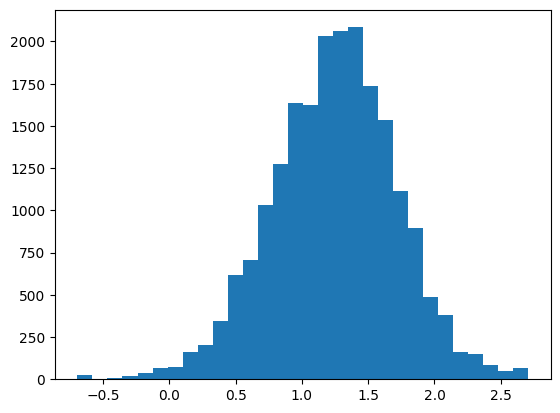

In [74]:
log_median_income = np.log(housing['median_income'])
plt.hist(log_median_income,bins=30);

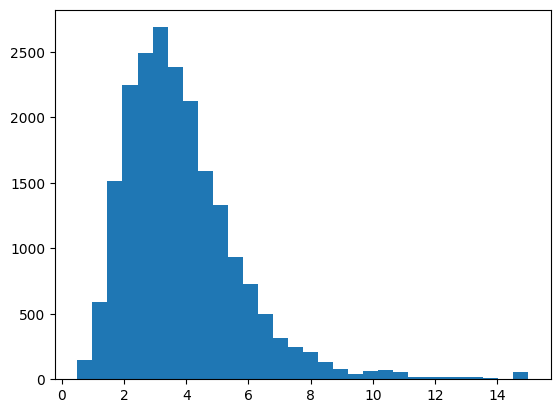

In [79]:
plt.hist(np.exp(log_median_income),bins=30);

In [80]:
correlation(x_scaled, y_scaled) == correlation(y_scaled, x_scaled)

np.True_

In [81]:
housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [82]:
housing_red = housing.drop('ocean_proximity', axis=1)
housing_red.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0


In [86]:
corr_mat = housing_red.corr()
corr_mat

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
longitude,1.000000,-0.924664,-0.108197,0.044568,0.069608,0.099773,0.055310,-0.015176,-0.045967
latitude,-0.924664,1.000000,0.011173,-0.036100,-0.066983,-0.108785,-0.071035,-0.079809,-0.144160
housing_median_age,-0.108197,0.011173,1.000000,-0.361262,-0.320451,-0.296244,-0.302916,-0.119034,0.105623
total_rooms,0.044568,-0.036100,-0.361262,1.000000,0.930380,0.857126,0.918484,0.198050,0.134153
total_bedrooms,0.069608,-0.066983,-0.320451,0.930380,1.000000,0.877747,0.979728,-0.007723,0.049686
population,0.099773,-0.108785,-0.296244,0.857126,0.877747,1.000000,0.907222,0.004834,-0.024650
households,0.055310,-0.071035,-0.302916,0.918484,0.979728,0.907222,1.000000,0.013033,0.065843
median_income,-0.015176,-0.079809,-0.119034,0.198050,-0.007723,0.004834,0.013033,1.000000,0.688075
median_house_value,-0.045967,-0.144160,0.105623,0.134153,0.049686,-0.024650,0.065843,0.688075,1.000000


In [89]:
corr_mat['median_house_value'].abs().sort_values()

population            0.024650
longitude             0.045967
total_bedrooms        0.049686
households            0.065843
housing_median_age    0.105623
total_rooms           0.134153
latitude              0.144160
median_income         0.688075
median_house_value    1.000000
Name: median_house_value, dtype: float64

In [90]:
correlations_sorted = corr_mat['median_house_value'].sort_values()
correlations_sorted[correlations_sorted.abs() > 0.1]

latitude             -0.144160
housing_median_age    0.105623
total_rooms           0.134153
median_income         0.688075
median_house_value    1.000000
Name: median_house_value, dtype: float64

In [91]:
correlations_sorted.abs() > 0.1

latitude               True
longitude             False
population            False
total_bedrooms        False
households            False
housing_median_age     True
total_rooms            True
median_income          True
median_house_value     True
Name: median_house_value, dtype: bool

Text(0.5, 1.0, 'Correlation Matrix')

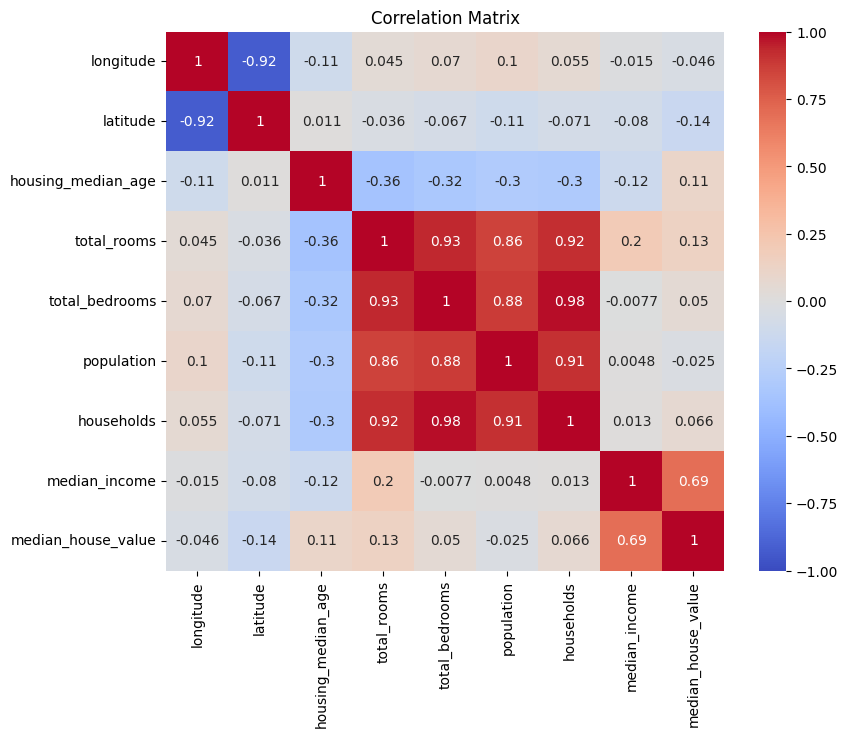

In [93]:
plt.figure(figsize=(9,7))
sns.heatmap(corr_mat, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Matrix')

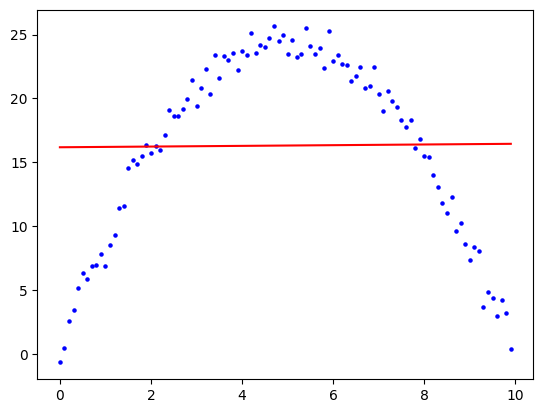

La correlación es de 0.011


In [94]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import linregress

# rho only measures linear dependence, not dependence in general
def fun_quadratic(x):
    xmax = np.max(x)
    return x * (xmax - x) + np.random.normal(0, 0.1 * xmax, len(x))

np.random.seed(456)
x = np.arange(0, 10, 0.1)
y = fun_quadratic(x)

# Plotting
plt.scatter(x, y, color='blue', s=5)
slope, intercept, _, _, _ = linregress(x, y)
plt.plot(x, intercept + slope * x, color='red')  # linear regression line
plt.show()

# Print correlation
print(f"La correlación es de {np.corrcoef(x, y)[0, 1]:.3f}")